# Interpolação de Lagrange vs Fourier

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Questão 1: Uma base fantasma

Escreva uma função `lagrange_basis(xs, k)` que, dados os pontos da lista (ou array) `xs`,
retorna o polinômio de lagrange que vale $1$ em `xs[k]` e $0$ nos demais pontos.

In [7]:
from functools import reduce

In [9]:
produto = lambda x,y : x*y

In [10]:
def lagrange_basis(xs, k=0):
    def p(x):
        return reduce(produto,[(x-x_i)/(xs[k]-x_i) for i,x_i in enumerate(xs) if i != k],1)
    return p

In [4]:
xs = [0,1,2]
ts = arange(-5,5,0.1)
p1 = lagrange_basis(xs, 1)
p2 = lagrange_basis(xs, 2)

def p1_ans(x):
    return 2*x - x**2
def p2_ans(x):
    return x*(x-1)/2

assert( allclose(p1(ts), p1_ans(ts), rtol=1e-15, atol=1e-15) )
assert( allclose(p2(ts), p2_ans(ts), rtol=1e-15, atol=1e-15) )

In [5]:
xs = 5*randn(10)
for k,x in enumerate(xs):
    p = lagrange_basis(xs, k)
    others = list(set(xs) - {x})
    assert( p(x) == 1 )
    assert( all(abs(p(others)) < 1e-15) )

## Questão 2: o ataque dos gráficos

Trace (no mesmo eixo) os 5 polinômios relativos aos pontos `xs = [0,2,5,6,10]`.

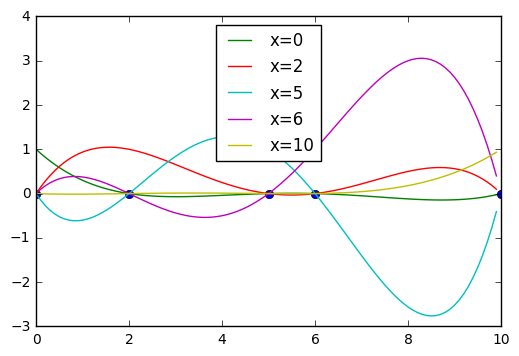

In [6]:
xs = [0,2,5,6,10]
plot(xs,zeros_like(xs),'o')
ts=arange(0,10,0.1)
for i,x_i in enumerate(xs):
    plot(ts,lagrange_basis(xs,i)(ts),label='x={}'.format(x_i))
legend(loc=0);

Faça o mesmo para os nós de -3 a 9.  Não esqueça a legenda!

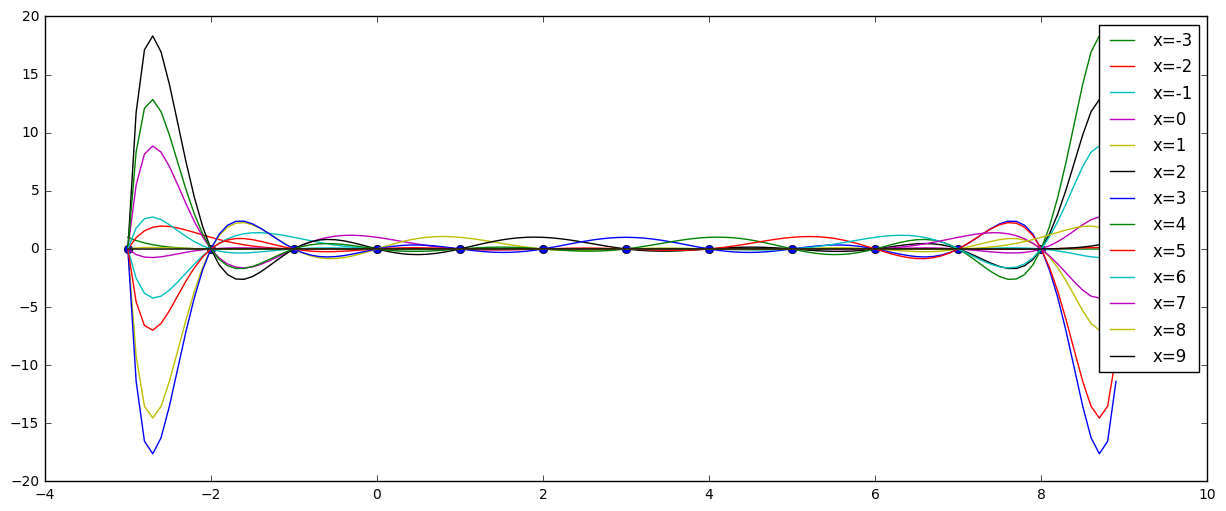

In [12]:
xs = arange(-3,10)
figure(figsize=(15,6))

plot(xs,zeros_like(xs),'o')
ts=arange(-3,9,0.1)
for i,x_i in enumerate(xs):
    plot(ts,lagrange_basis(xs,i)(ts),label='x={}'.format(x_i))
legend(loc=0);

Agora, observe como estes polinômios se comportam "um pouquinho" fora do intervalo de interpolação:

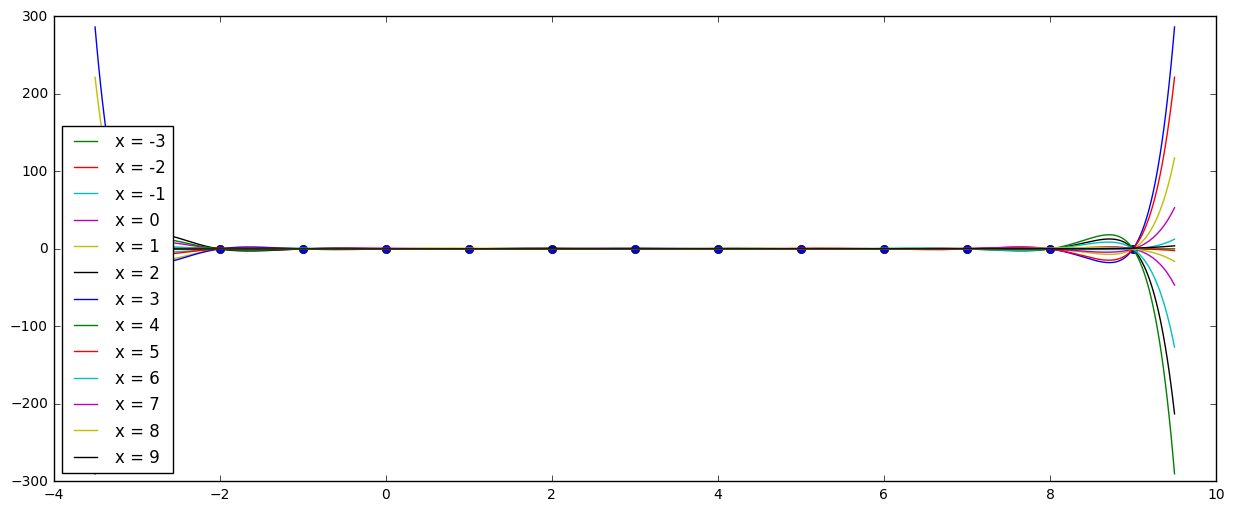

In [38]:
xs = arange(-3,10)
figure(figsize=(15,6))
ts = linspace(-3.5,9.5,600)

s = zeros_like(ts)

plot(xs,zeros_like(xs),'o')
for i,x_i in enumerate(xs):
    s += lagrange_basis(xs,i)(ts)
    plot(ts,lagrange_basis(xs,i)(ts),label='x = {}'.format(x_i))
legend(loc=0);

Descreva e explique este comportamento.

YOUR ANSWER HERE

## Questão 3: A vingança de Fourier

Faça o mesmo estudo anterior para encontrar os polinômios trigonométricos que valem 1 num nó, e zero nos demais.

Observe que os nós `xs` não precisam ser igualmente espaçados, nem estar no intervalo $[0,2\pi)$, e portanto você provavelmente tem que montar o sistema e resolvê-lo...

In [8]:
def ek(v,k):
    ''' Builds the $k$-th unit vector in the space of `v` '''
    e = zeros_like(v)
    e[k] = 1
    return e

In [13]:
'''def lagrange_basis(xs, k=0):
    def p(x):
        return reduce(produto,[(x-x_i)/(xs[k]-x_i) for i,x_i in enumerate(xs) if i != k],1)
    return p'''

def fourier_basis(xs, k=0):
    # YOUR CODE HERE
    raise NotImplementedError()

### Testes sobre os valores dos polinômios

In [14]:
xs = [0,2*pi/3,4*pi/3]
ts = arange(-5,5,0.1)
p1 = fourier_basis(xs, 1)
p2 = fourier_basis(xs, 2)

def p1_ans(x):
    return 1/3 - cos(x)/3 + sin(x)/sqrt(3)
def p2_ans(x):
    return 1/3 - cos(x)/3 - sin(x)/sqrt(3)

assert( allclose(p1(ts), p1_ans(ts), rtol=1e-15, atol=1e-15) )
assert( allclose(p2(ts), p2_ans(ts), rtol=1e-15, atol=1e-15) )

AssertionError: 

In [ ]:
seed(4321)
xs = 5*randn(11)
for k,x in enumerate(xs):
    print(k)
    p = fourier_basis(xs, k)
    others = list(set(xs) - {x})

    px = real(p(x))
    pothers = real(p(others))

    assert( abs(px - 1) < 2e-13 ), '1: {}'.format(px-1)
    assert( all(abs(pothers) < 2e-13) ), '0: {}'.format(pothers)

### E agora, gráficos

Trace (no mesmo eixo) os polinômios relativos aos pontos `xs = [0,2,5,6,10]`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Questão 4: Uma nova base

Poderíamos escolher como pontos de interpolação de Lagrange não pontos igualmente espaçados,
mas quaisquer outros.

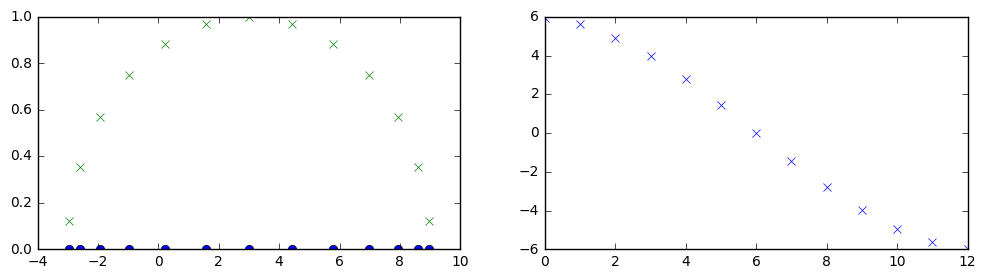

In [15]:
ns = 2*arange(13) + 1
cheby_xs = 3 + 6*cos(pi*ns/26)
cheby_ys = sin(pi*ns/26)

figure(figsize=(12,3))
subplot(1,2,1)
plot(cheby_xs, zeros_like(cheby_xs), 'o')
plot(cheby_xs, cheby_ys, 'x')
subplot(1,2,2)
plot(cheby_xs - 3, 'x');

Agora, faça os gráficos da base de Lagrange com estes pontos.

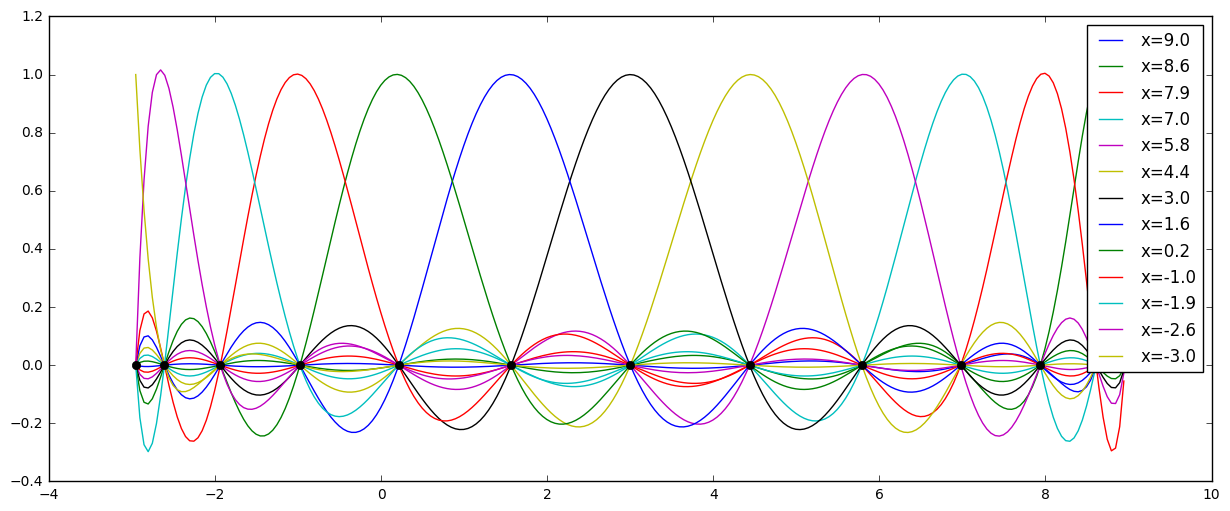

In [28]:
figure(figsize=(15,6))

ts = arange(min(cheby_xs),max(cheby_xs),0.05)
for i,x in enumerate(cheby_xs):
    plot(ts,lagrange_basis(cheby_xs,i)(ts),label='x={:.1f}'.format(x))
plot(cheby_xs, zeros_like(cheby_xs), 'o')
legend(loc=0);

O que você observa neste caso?

YOUR ANSWER HERE

# Parte 2: Comparando

Vamos estudar as bases de Lagrange e Fourier para interpolação em $[0, 2\pi]$.
A base de Lagrange serão 14 pontos igualmente espaçados, enquanto a de Fourier (por periodicidade)
terá apenas 13 pontos.

In [ ]:
xs = linspace(0,2*pi,14)
ts = linspace(0,2*pi, 500)

## Questão 5: Simmetry strikes back

Faça um gráfico com os polinômios de índices 0, 3, 6, 7 e 10 para cada base.

### Lagrange

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explique (demonstre!) a simetria da figura.

YOUR ANSWER HERE

### Fourier

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explique a simetria aqui também.
Este deve possuir **mais** simetrias do que o de Lagrange.
Explique porquê.

YOUR ANSWER HERE

## Questão 6: O retorno de Fourier

Faça o gráfico de todos os polinômios da base de Lagrange.
(vai ficar um pouco "embolado")

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

E da base de Fourier:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que há de diferente?

YOUR ANSWER HERE

## Questão 7: The cosine awakens

Demonstre a simetria observada na base completa de Fourier.

YOUR ANSWER HERE

Agora, estude também a "simetria" da base de Lagrange com pontos de Chebychev da questão 4.

YOUR ANSWER HERE